magnitude specturm of noisy picture (from fourier transform)
description: bright spots aside from the center are frquency of periodic noise


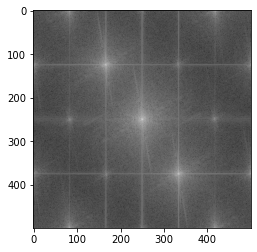

In [18]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img=cv2.imread("noisy_kitty55.png",0)
#img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
F = np.fft.fft2(img)
FShift = np.fft.fftshift(F)

magnitude_spectrum = np.log(1+np.abs(FShift))
print('magnitude specturm of noisy picture (from fourier transform)')
print('description: bright spots aside from the center are frquency of periodic noise')

plt.imshow(magnitude_spectrum,cmap='gray')
plt.show()




bandreject filter for clearing periodic noise (filtering out periodic noise frquency)


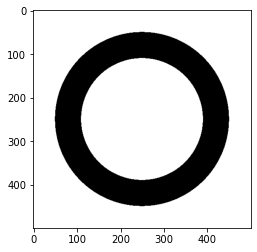

magnitude spectrum of periodic-noise-filtered picture


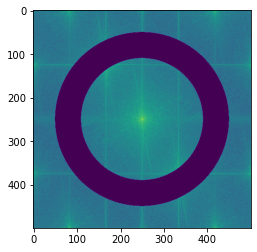

periodic-noise-filtered picture


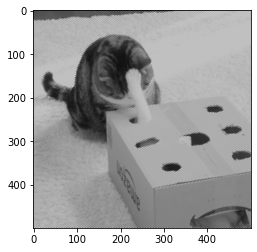

True

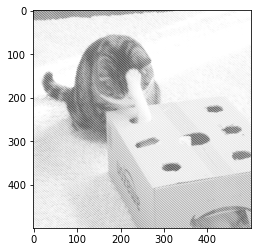

In [19]:
nx, ny = img.shape
y = np.linspace(-nx/2,nx/2,nx)
x = np.linspace(-ny/2,ny/2,ny)
xv, yv = np.meshgrid(x,y) 
radiusCoor = np.sqrt(xv**2 + yv**2)
r1 = radiusCoor < 140
r2 = radiusCoor >= 200
mask1 = np.ones([nx,ny])
bandReject = cv2.bitwise_or(r1.astype(np.uint8),r2.astype(np.uint8),mask=mask1.astype(np.uint8))

print('bandreject filter for clearing periodic noise (filtering out periodic noise frquency)')
plt.imshow(bandReject,cmap='gray')
plt.show()

img_bandReject = bandReject * FShift
img_ft_filter_hp_spectrum = np.log(1+np.abs(img_bandReject))

print('magnitude spectrum of periodic-noise-filtered picture')
plt.imshow(img_ft_filter_hp_spectrum)
plt.show()
f_ishift_br = np.fft.ifftshift(img_bandReject)
img_restored = np.fft.ifft2(f_ishift_br)
img_restored = np.abs(img_restored)
img_restored=img_restored*255/np.max(img_restored)

print('periodic-noise-filtered picture')
plt.imshow(img_restored,cmap='gray')
plt.show()
plt.imshow(img,cmap='gray')

cv2.imwrite('restore.png', img_restored)